# Feature extraction with scikit-learn

> Written by Dr Daniel Buscombe, Northern Arizona University

> Part of a series of notebooks for image recognition and classification using deep convolutional neural networks

This notebook is an introduction to image feature extraction, which is usually a necessary step for machine learning based classifiers. This feature extraction is what deep learning tries to avoid

turn images into a set of data amenable to ML algorithm. NN will take data nnatively but not all will.
Matplotlib inline is a way to see our plots in our workbook
numpy numerical python the standard way that most people would work with their data
matplotlib pyplot is the plotting library.
The toolbox is scikit learn is powerful for ML (probably not DL) a nice well supported well written module. Easy to use because everything follows the same strcture, fit and predict, initiate model and then that is treated as a fit class and predict class. 

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

Scikit-learn is a module for machine learning algorithms

* Supervised learning
* Unsupervised learning
* Dimensionality reduction
* Parameter selection
* Cross-validation

The scikit-learn toolbox (or sklearn) is a machine learning package built on the SciPy Stack, developed by an international community of practitioners under the leadership of a team of researchers in INRIA, France. 

It provides tools for regression, classification, clustering, dimensionality reduction, parameter selection and cross-validation. 

Gaussian mixture models, decision trees, support vector machines, and Gaussian processes are a few examples of the methods available to date.

## Fit/Predict

Scikit-learn's objects implements a fit/predict interface

* fit
    * learning step (supervised or unsupervised)
* predict
    * regression or classification
* The learned model can be stored using Python’s built-in persistence model, pickle

Sklearn is able to evaluate an estimator’s performance and parameters by cross-validation, optionally distributing the computation to several computer cores if necessary. The sklearn module implements machine learning algorithms as objects that provide a fit/predict interface. The fit method performs learning (supervised or unsupervised, according to the algorithm). The predict method performs regression or classification. The learned model can be saved for further usage by pickle, the Python’s built-in persistence model.

Let's load in a function to read an image

In [2]:
from imageio import imread

## Feature engineering/extraction

Before applying any ML method, you must first extract these features from your data: there is no formula for how to do this that applies across all domains, and thus this is where you as a data scientist must exercise your own intuition and expertise.

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster. (it does this by reducing them down to less data by clumping or grouping)

(this can also be called feature engineering. Is this a biasing task because you are using your model to feature extraction. DL is popular because you don't have to go through this process and it is objective)

Typically you need to do a feature selection or extraction usually you do this by experience and the types of models you end up using


We'll take a look at just two feature extraction methods, namely HOG (histogram of oriented gradients) and PCA (principal components analysis)

![](http://www.bogotobogo.com/python/scikit-learn/images/features/FeatureExtraction.png)

### HOG features

we will take a look at one such feature extraction technique, the Histogram of Oriented Gradients (HOG), which transforms image pixels into a vector representation that is sensitive to broadly informative image features regardless of confounding factors like illumination.

Creates a histogram paying attention to the orientation of the images keeping in mind you can come at the image from multiple direction (kind of like a multi-angle edge detection)

The Histogram of Gradients is a straightforward feature extraction procedure that was developed in the context of identifying pedestrians within images. HOG involves the following steps:

* Optionally pre-normalize images. This leads to features that resist dependence on variations in illumination. 
* Convolve the image with two filters that are sensitive to horizontal and vertical brightness gradients. These capture edge, contour, and texture information. (tile sweeps through entire image extracting data)
* Subdivide the image into cells of a predetermined size, and compute a histogram of the gradient orientations within each cell.
* Normalize the histograms in each cell by comparing to the block of neighboring cells. This further suppresses the effect of illumination across the image.
* Construct a one-dimensional feature vector from the information in each cell.

I think of HOG features as image 'streamlines'

feature.hog? is the help. 

working with data in s# bucket so need that utility. Log in anonymously again
He is using the airplane example because it has good edges

You can see the different ways to change the size, pixels, sampling window size etc. he looks at 9 orientations and the larger window size will give more course outputs. 
orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm=None, visualize=False, visualise=None, transform_sqrt=False, feature_vector=True, multichannel=None)
Docstring:

This HOG pulls out the most impolrtant features notice how the tarmac is not evaluated


In [3]:
## import libraries from scikit-image and call the hog function help
from skimage import feature, color
feature.hog?

Signature: feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm=None, visualize=False, visualise=None, transform_sqrt=False, feature_vector=True, multichannel=None)
Docstring:
Extract Histogram of Oriented Gradients (HOG) for a given image.

Compute a Histogram of Oriented Gradients (HOG) by

    1. (optional) global image normalization
    2. computing the gradient image in `row` and `col`
    3. computing gradient histograms
    4. normalizing across blocks
    5. flattening into a feature vector

Parameters
----------
image : (M, N[, C]) ndarray
    Input image.
orientations : int, optional
    Number of orientation bins.
pixels_per_cell : 2-tuple (int, int), optional
    Size (in pixels) of a cell.
cells_per_block : 2-tuple (int, int), optional
    Number of cells in each block.
block_norm : str {'L1', 'L1-sqrt', 'L2', 'L2-Hys'}, optional
    Block normalization method:

    ``L1``
       Normalization using L1-norm. (default)
    ``L1-sqrt`

In [4]:
# import our S3 file system utility
import s3fs
fs = s3fs.S3FileSystem(anon=True)

Below we open an image from one of the S3 datasets (specifically, an airplane)

The _, hog the _ tells python only return the thing I want not everything. 

/opt/conda/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/opt/conda/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


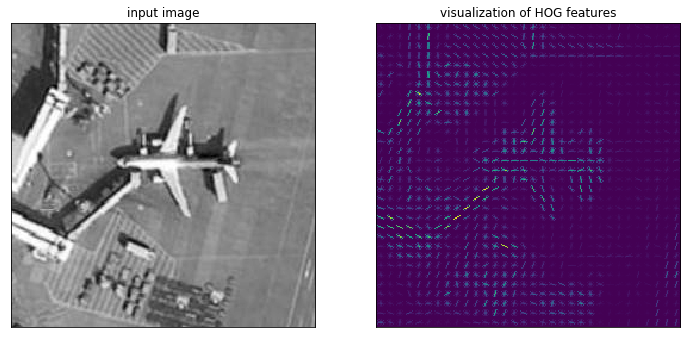

In [5]:
#load in image
with fs.open('cdi-workshop/imrecog_data/NWPU-RESISC45/test/airplane/airplane_700.jpg', 'rb') as f:
    image = color.rgb2gray(imread(f, 'jpg'))

##extract HOG features
_, hog_vis = feature.hog(image, visualise=True)

##create a figure and show the input image and HOG features side by side 
fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

Playing with algorithm inputs ...

/opt/conda/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/opt/conda/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


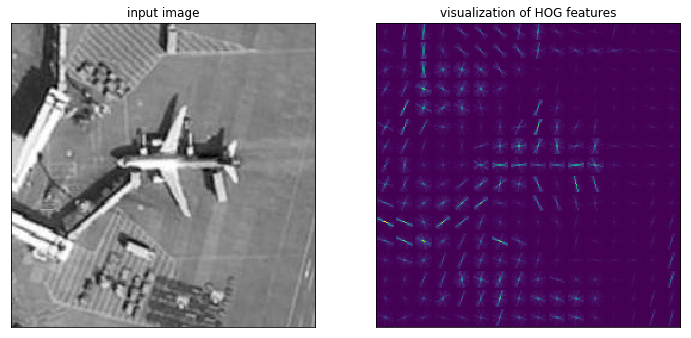

In [6]:
##extract HOG features
_, hog_vis = feature.hog(image, orientations=30, visualise=True, transform_sqrt=True, pixels_per_cell=(16, 16))

##create a figure and show the input image and HOG features side by side 
fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

### Principal Components

above notuce the difference in window size creates courser tiles.

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

PCA reduces a set of possibly correlated, high dimensional variables to a lower dimensional set of linearly correlated variables called principal components

This time we're treating each pixel as a unique feature, and we'll use PCA to reduce the number of features

First, let's set up a dataset to use. The EuroSAT data has images in 10 categories
This first thing is reminding of us the 10 categories we had in the eurostat data set

In [7]:
## list the subdirectories of the EuroSAT data
cats = [f for f in fs.ls('cdi-workshop/imrecog_data/EuroSAT')]
cats

['cdi-workshop/imrecog_data/EuroSAT/AnnualCrop',
 'cdi-workshop/imrecog_data/EuroSAT/Forest',
 'cdi-workshop/imrecog_data/EuroSAT/HerbaceousVegetation',
 'cdi-workshop/imrecog_data/EuroSAT/Highway',
 'cdi-workshop/imrecog_data/EuroSAT/Industrial',
 'cdi-workshop/imrecog_data/EuroSAT/Pasture',
 'cdi-workshop/imrecog_data/EuroSAT/PermanentCrop',
 'cdi-workshop/imrecog_data/EuroSAT/Residential',
 'cdi-workshop/imrecog_data/EuroSAT/River',
 'cdi-workshop/imrecog_data/EuroSAT/SeaLake']

We'll import a function that will resize all images to a specified size

This is an important step in reproducing Jessica Block tool of resizing all the images in the data set because depending where you get the image they can be different sizes. Below this is loading in all the images in the highway category the files line lists all the files in that subdirectory and pulling the ones that end in .jpg then the with read it in
images.append resizes and turns to grayscale

In [8]:
from skimage.transform import resize

In [9]:
## read in all the Highway files, convert to greyscale, resize, and flatten to a 1D vector
# this first line is an empty list 
images = []
files = [f for f in fs.ls('cdi-workshop/imrecog_data/EuroSAT/Highway') if f.endswith('.jpg')]
for file in files:
##below resizes, then turns to rgb and flatten takes your tiles and turns it into a single column also maybe useful for J Block tiling of categories    
    with fs.open(file, 'rb') as f:
        images.append(resize(color.rgb2gray(imread(f, 'jpg')), (128, 128)).flatten())

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [12]:
## transform image data from list to numpy array
images = np.asarray(images)

In [13]:
np.shape(images)

(2500, 16384)

In principal component analysis, the relationship between data dimensions is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset

Reduce the dimensions using PCA
below is telling us about tthis it is housed in sklearn library

In [14]:
from sklearn.decomposition import PCA
PCA?


Init signature: PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
Docstring:     
Principal component analysis (PCA)

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float, None or string
    Number of components to keep.
    if n_components is not set all components are kept::

        n_components == min(n_samples, n_features)

    if n_components == 'mle' and svd_

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

### PCA demonstration

Here is an example of using PCA as a dimensionality reduction transform:

He is going to ask for a single principle component and then fit that so what is one pricniple component in the images then transform it so that it only shows us that one princi0ple comonent (also a good way to sort the tile with the prototypical) Thi

In [15]:
# make PCA object with 1 component
pca  =  PCA(n_components =1)
## fit to data
pca.fit(images)
## apply the transformation
images_pca = pca.transform(images)
## compare shapes
print("original shape:   ", images.shape)
print("transformed shape:", images_pca.shape)

original shape:    (2500, 16384)
transformed shape: (2500, 1)


the 2500, 16384 says there are 16384 features (pixels) in the original we then just turn these into a correlation matrix that is your image. 
The 2500, 1 is saying only 1 principle compnent 

The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

So this will take the point cloud and reduce it to a single line 1 principle component

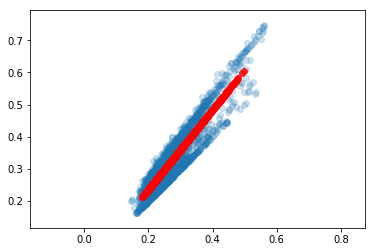

In [16]:
images_new = pca.inverse_transform(images_pca)
plt.scatter(images[:, 0], images[:, 1], alpha=0.2)
plt.scatter(images_new[:, 0], images_new[:, 1], color='r', alpha=0.8)
plt.axis('equal');

Note the PCA is done on all the data at the same time not just each image. 
Above the blue lines are in image space taken the columns and comparing them, the red line is in input space

The blue points are the original data, while the red points are the projected version. 

This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### Dimensionality reduction of airplane images

We're going to find 100 principal components using 
* Randomized SVD (singular value decomposition) solver
* Whiten (vectors are multiplied by the $\sqrt(N)$ and then divided by the singular values to ensure uncorrelated outputs)
n_components=100 is looking at the first 100 prinicple components
the random state is the seed number, it is selected to that we all get the same result and reproducible he set it from hitch hiker guide to the galaxy

In [17]:
pca = PCA(svd_solver='randomized', n_components=100, whiten=True, random_state=42)
pca.fit(images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=True)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

The first PCA shows most variance and so forth

In [18]:
print(pca.components_)

[[ 3.89361117e-03  4.83971817e-03  4.81115085e-03 ...  5.67183028e-03
   5.70519788e-03  4.24365046e-03]
 [ 7.46320670e-05  4.06571564e-04  4.71975555e-04 ... -1.39706296e-03
  -1.25208050e-03 -4.18660884e-04]
 [ 1.74481436e-03  4.30603571e-03  4.32354988e-03 ... -6.76379062e-03
  -6.58135980e-03 -2.98744982e-03]
 ...
 [ 3.82300268e-04  3.25865142e-03  4.32760668e-03 ... -5.66535806e-03
  -5.86230626e-03 -4.42381471e-03]
 [-8.08589050e-03 -1.55715643e-02 -1.50817860e-02 ...  4.58927150e-03
   6.53531948e-03  3.95593908e-03]
 [-4.18776596e-03 -5.49131357e-03 -3.20079285e-03 ... -7.45865808e-03
  -7.94246204e-03 -3.28422417e-03]]


In [19]:
print(pca.explained_variance_)

[189.1714445   12.81649284  10.54824204   6.73181925   4.98579525
   4.29362825   3.88256814   3.45557695   2.92287123   2.31485041
   2.18644421   2.14457158   2.10598808   1.9242585    1.7772866
   1.58397594   1.51738772   1.40110059   1.35079817   1.30883564
   1.28142337   1.15758859   1.1120262    1.09314751   0.9789888
   0.9237067    0.90422675   0.89258243   0.85455653   0.83053573
   0.80269801   0.77815157   0.75099244   0.70426542   0.67709741
   0.65286464   0.63836623   0.63148807   0.60715993   0.60445887
   0.59005126   0.5794699    0.56997341   0.55014582   0.5370339
   0.52779951   0.50422714   0.48650708   0.48072986   0.46987934
   0.45884022   0.44462778   0.44217761   0.43229052   0.43166278
   0.42291696   0.41907613   0.39974361   0.39645434   0.37804623
   0.3747919    0.37447884   0.36209496   0.36072147   0.35494091
   0.34579132   0.34335722   0.33079743   0.3274531    0.3217324
   0.31705895   0.31680037   0.30896426   0.29868594   0.29570334
   0.29259935 

It can be interesting to visualize the images associated with the first several principal components (these components are known as "eigenvectors")

The top left shows the 1st PC then to the right then down so this might also be a good way to sort the columns from highest PC then down

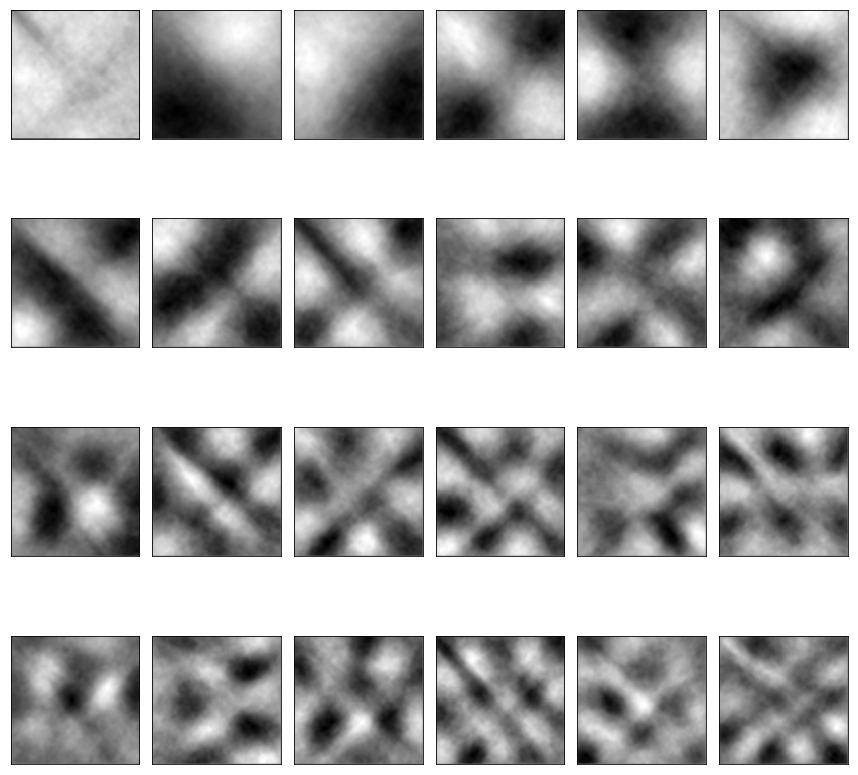

In [20]:
fig, axes = plt.subplots(4, 6, figsize=(15, 15),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(128, 128), cmap='gray')

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

A plot of how much variance is picked up by each PC, the first one takes up 60% and 80% of variance is taken up by 20 PC

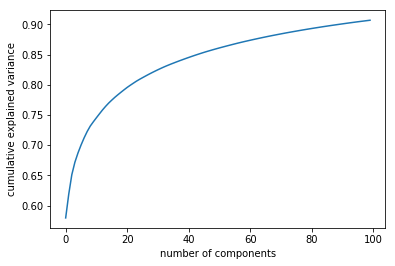

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 50 components account for ~85% of the variance. That would lead us to believe that using these 50 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 50 components:

This is looking at just the first 50 compnents
pca.inverse_transform transforms the model back to images

In [22]:
# Compute the components and projected images
components = pca.transform(images)
projected = pca.inverse_transform(components)

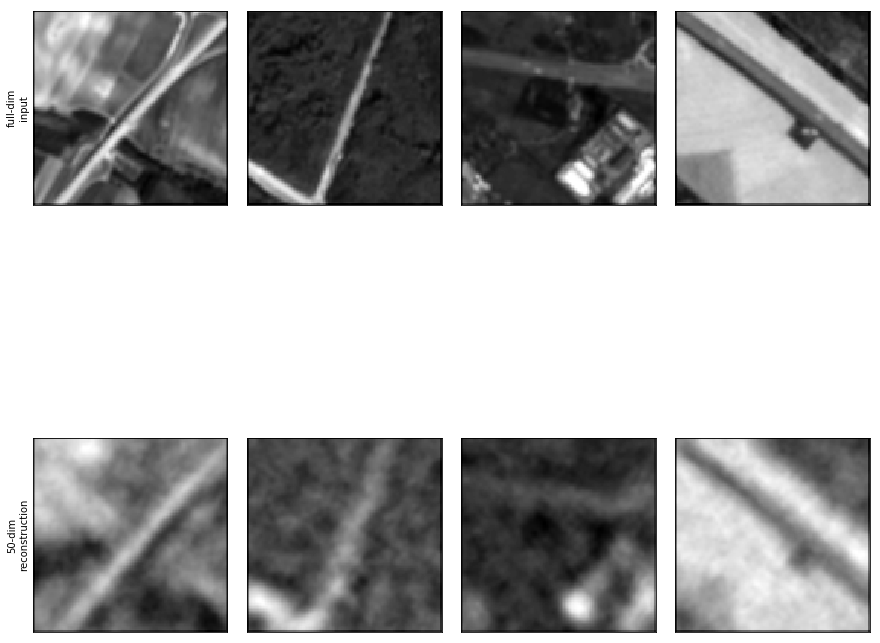

In [23]:
# Plot the results
fig, ax = plt.subplots(2, 4, figsize=(15, 15),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(4):
    ax[0, i].imshow(images[i].reshape(128, 128), cmap='gray')
    ax[1, i].imshow(projected[i].reshape(128, 128), cmap='gray')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('50-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 50 of the initial features.

(note that it preserved the most important thing and got rid of noisy data. this is also important in reconstructing Jessicas tool.)

Although it reduces the dimensionality of the data, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 50-dimensional data rather than very high dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

## Exercises

1. How many principal components do you need for stationary camera time-series?

We have several time-series of images from a stationary camera in Grand Canyon. Such as this one:The exercise_solutions folder conatins the answer

In [24]:
# Rc1671l/flood4 is a series of images from grand canyon from a stationary camera and then flood happens
# to reduce these images just to the salient features we are going to use PCA
files = [f for f in fs.ls('cdi-workshop/semseg_data/RC1671L/flood4')]

In [25]:
from scipy.misc import imresize

with fs.open(files[0], 'rb') as f:
    nx, ny = np.shape(imresize(color.rgb2gray(imread(f, 'jpg')), .25))

#changes the color, pulls only things with jpg, and then flattens    
images = []
for file in files:
    with fs.open(file, 'rb') as f:
        images.append(imresize(color.rgb2gray(imread(f, 'jpg')), .25).flatten())

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Make a plot showing all eight images

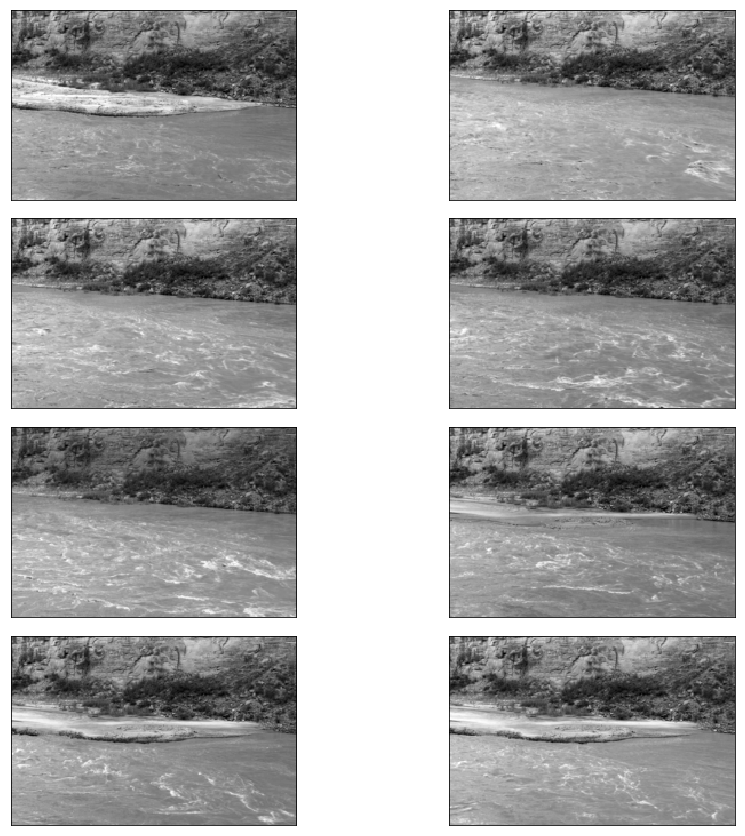

In [35]:

fig, axes = plt.subplots(4, 2, figsize=(15, 15),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(nx, ny), cmap='gray')
#nx and ny are putting the images back into 2D because it was imported as 1D

# doing image[i] is just indexing and looping for how many ever images we started with

Decompose the image into principal components. How many components are needed to explain >85% of the variance?

array([0.41983141, 0.6914381 , 0.7987064 , 0.87543528, 0.93087938,
       0.9714392 , 1.        , 1.        ])

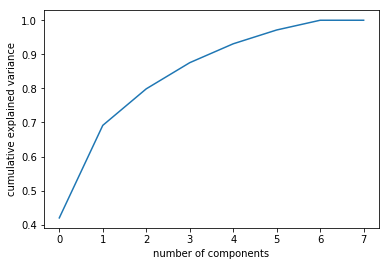

In [36]:
pca = PCA(svd_solver='randomized', n_components=100, whiten=True, random_state=42)
pca.fit(images)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

np.cumsum(pca.explained_variance_ratio_)

In [ ]:
# Python starts counting from 0 so in a plot like above 0 is the first

Make a plot to visualize those components. What do you notice?

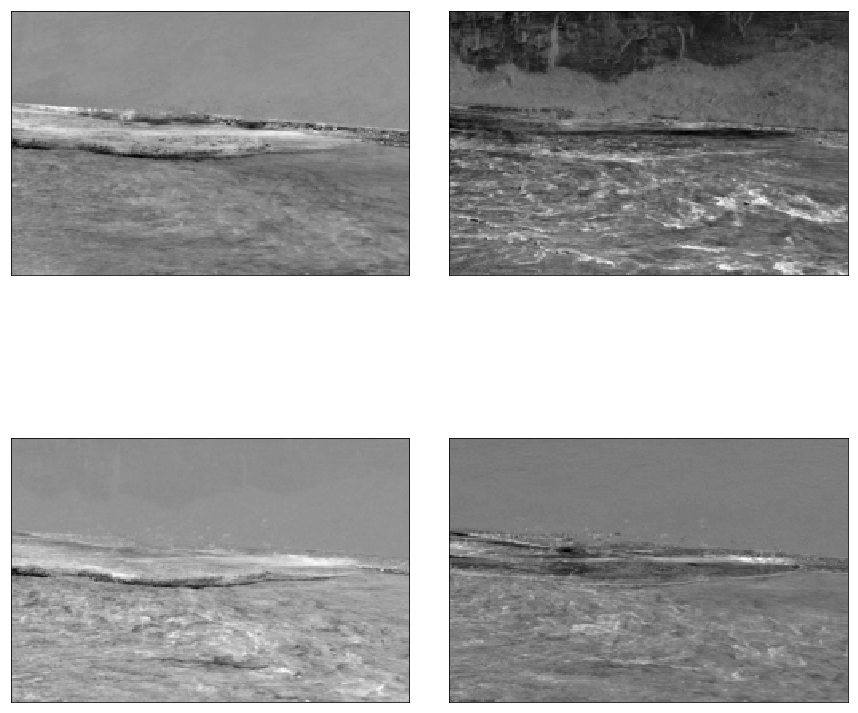

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(nx, ny), cmap='gray')
    
# so again the [i] is having it loop through the components ther eis four so i will go through 4 and then plot
#it. the 2, 2 is because he knows there are four components

# notice the first component is just the sand bar, then compnent 2 is the background then high water then low water

Transform the images into principal components, then do the inverse transform to get projected images


In [38]:
#fitting the compnents and then back transforming

components = pca.transform(images)
projected = pca.inverse_transform(components)

Make a plot comparing the original with projected images

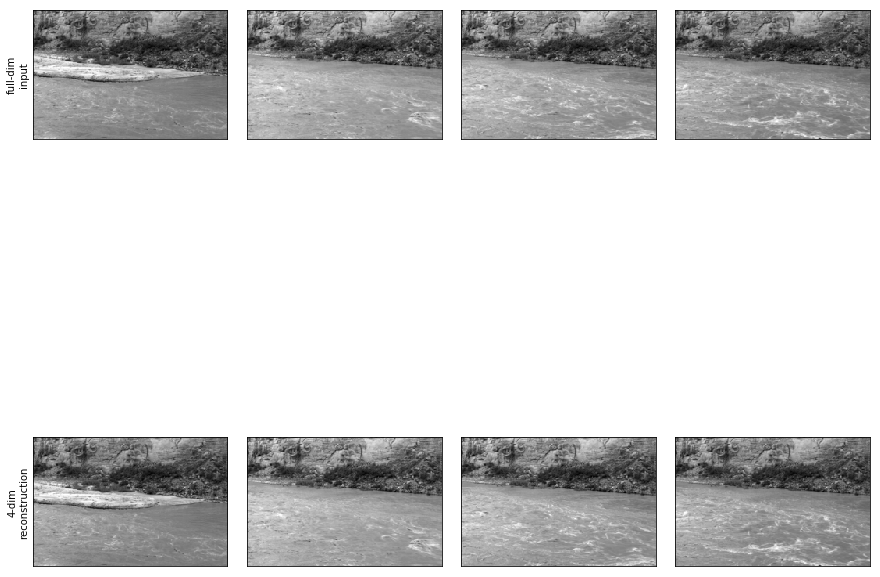

In [42]:
# Plot the results
fig, ax = plt.subplots(2, 4, figsize=(15, 15),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(4):
    ax[0, i].imshow(images[i].reshape(nx, ny), cmap='gray')
    ax[1, i].imshow(projected[i].reshape(nx, ny), cmap='gray')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('4-dim\nreconstruction');

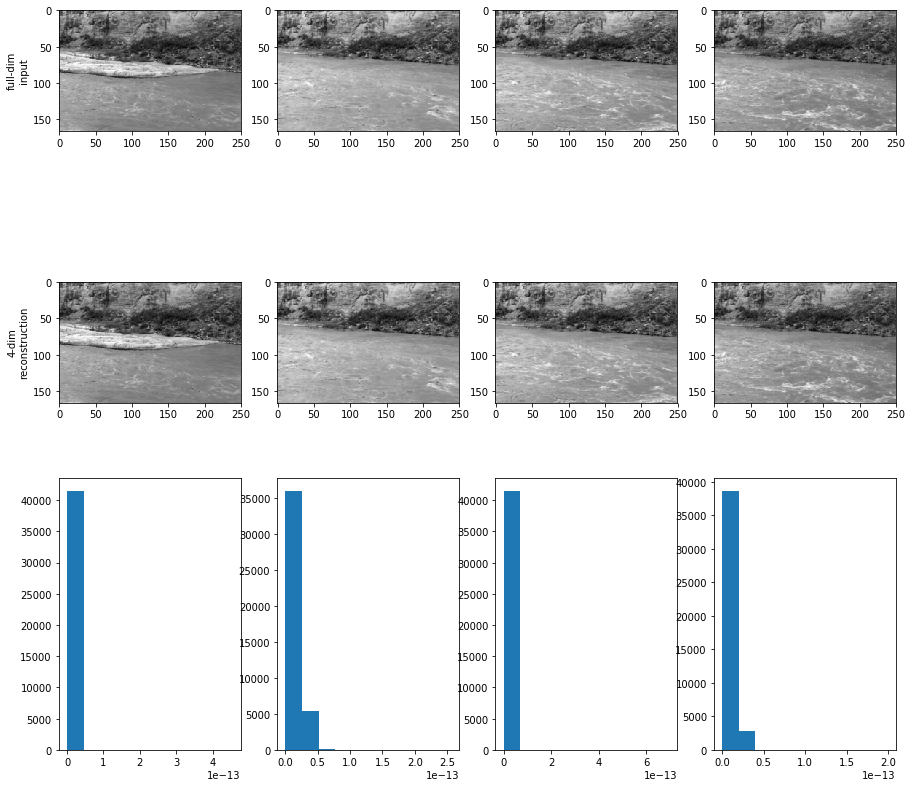

In [41]:
# Plot the results
fig, ax = plt.subplots(3, 4, figsize=(15, 15),
                       #subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0, wspace=0.2))
for i in range(4):
    ax[0, i].imshow(images[i].reshape(nx, ny), cmap='gray')
    ax[1, i].imshow(projected[i].reshape(nx, ny), cmap='gray')
    ax[2, i].hist(np.abs(images[i].reshape(nx, ny) - projected[i].reshape(nx, ny)).flatten())
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('4-dim\nreconstruction');

In [ ]:
# histoggram of image intensity so almost zero 